In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

from IPython.display import display

In [4]:
PATH = os.path.abspath('..')

# Load in catalogs

In [65]:
# load in all products
preds = pd.read_csv(f'{PATH}/catalogs/predictions-oh_p50.csv', index_col=0)
inds = preds.index

full_df = pd.read_csv(f'{PATH}/catalogs/SDSSspecgalsDR14_boada.csv', index_col=0)
full_df = full_df.loc[inds].drop_duplicates()

In [66]:
display(full_df.describe())
display(preds.describe())

,specObjID,ra,dec,z,zErr,velDisp,velDispErr,modelMag_u,modelMagErr_u,modelMag_g,...,d4000,d4000_err,bptclass,oh_p2p5,oh_p16,oh_p50,oh_p84,oh_p97p5,lgm_tot_p50,sfr_tot_p50
count,2.046700e+04,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,...,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,1.661916e+18,184.536374,24.887878,0.077029,0.000009,75.549014,21.380513,18.913363,0.043509,17.665191,...,1.420650,0.022471,0.998534,8.806661,8.857076,8.905743,8.950468,8.992479,8.053131,0.155682
std,8.360647e+17,59.535196,18.932095,0.039442,0.000004,55.120285,25.198336,0.713774,0.031934,0.684137,...,0.135274,0.011485,0.054125,0.268275,0.232733,0.200184,0.179847,0.172914,139.915449,0.556730
min,2.995007e+17,0.168292,-11.182179,0.020014,0.000003,0.000000,-3.000000,14.381130,0.006183,13.886560,...,0.000000,0.000000,-1.000000,7.736374,7.835169,7.896335,7.989066,8.057620,-9999.000000,-4.296250
25%,9.300912e+17,150.752027,9.704798,0.047410,0.000007,46.941825,12.183475,18.536570,0.029249,17.325245,...,1.337840,0.014743,1.000000,8.700136,8.744190,8.808639,8.845257,8.879231,9.639667,-0.189512
50%,1.616832e+18,185.095898,23.161765,0.070862,0.000009,72.477320,16.653120,19.026430,0.039504,17.832370,...,1.408069,0.019888,1.000000,8.878203,8.925783,8.955670,8.991926,9.016858,10.058100,0.171191
75%,2.370139e+18,220.728231,39.120015,0.098006,0.000011,100.155050,24.008630,19.386805,0.052382,18.153095,...,1.493062,0.027343,1.000000,8.992717,9.014799,9.054213,9.085104,9.117371,10.415375,0.527011
max,3.348596e+18,359.976476,69.908206,0.364123,0.000130,850.000000,1600.000000,23.692340,1.704621,22.461750,...,3.873904,0.302199,1.000000,9.404011,9.443880,9.465558,9.475378,9.479278,12.492280,3.875005


,oh_p50,prediction
count,20466.000000,20466.000000
mean,8.905734,8.907569
std,0.200185,0.174790
min,7.896335,8.129671
25%,8.808609,8.816445
50%,8.955654,8.957441
75%,9.054208,9.039455
max,9.465558,9.199911


In [67]:
display(full_df.head())
display(preds.head())

,specObjID,ra,dec,z,zErr,velDisp,velDispErr,modelMag_u,modelMagErr_u,modelMag_g,...,d4000,d4000_err,bptclass,oh_p2p5,oh_p16,oh_p50,oh_p84,oh_p97p5,lgm_tot_p50,sfr_tot_p50
objID,,,,,,,,,,,,,,,,,,,,,
1237658493878337647,1392840760562313216,153.065673,9.393589,0.052860,0.000010,0.00000,100.59110,19.24347,0.053739,17.83226,...,1.393617,0.034535,1,8.164732,8.378000,8.577997,8.680438,8.748820,9.410803,-0.398485
1237665330918850673,2240661544268490752,165.432551,31.554196,0.034537,0.000007,42.24826,12.03756,17.99890,0.026781,16.42890,...,1.403976,0.014674,1,8.653717,8.701375,8.726439,8.756987,8.824885,9.542205,-0.178529
1237657630582178125,928874883251726336,123.488570,33.123225,0.111484,0.000007,99.12975,21.82991,18.67058,0.030337,17.70349,...,1.306892,0.015236,1,8.899887,8.938868,8.948060,8.956317,8.959596,10.287520,0.875822
1237651250411405534,501053527515228160,130.248831,50.149482,0.156886,0.000017,162.45530,15.42012,20.12226,0.137734,18.44958,...,1.675999,0.027175,1,8.725135,8.819554,8.894798,8.962484,9.010794,10.776900,0.403948
1237674651536261211,317593961499748352,173.030116,0.910884,0.029602,0.000011,51.42912,33.51934,19.09125,0.073329,17.66509,...,1.621131,0.065915,1,8.077692,8.181426,8.333275,8.494060,8.608570,8.885455,-0.606143


,oh_p50,prediction
objID,,
1237658493878337647,8.577997,8.696861
1237665330918850673,8.726439,8.757436
1237657630582178125,8.948060,9.024221
1237651250411405534,8.894798,9.015285
1237674651536261211,8.333275,8.544479


In [68]:
df = preds.join(full_df[['z', 'lgm_tot_p50', 'sfr_tot_p50']], how='left')
df.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50
count,20467.000000,20467.000000,20467.000000,20467.000000,20467.000000
mean,8.905744,8.907578,0.077029,8.053131,0.155682
std,0.200184,0.174790,0.039442,139.915449,0.556730
min,7.896335,8.129671,0.020014,-9999.000000,-4.296250
25%,8.808639,8.816448,0.047410,9.639667,-0.189512
50%,8.955670,8.957461,0.070862,10.058100,0.171191
75%,9.054213,9.039458,0.098006,10.415375,0.527011
max,9.465558,9.199911,0.364123,12.492280,3.875005


In [69]:
# only select reasonably high-mass objects
df = df[df.lgm_tot_p50 > 8.5].copy()
df.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50
count,20364.000000,20364.000000,20364.000000,20364.000000,20364.000000
mean,8.908361,8.910001,0.077244,10.017997,0.161179
std,0.196256,0.170979,0.039306,0.548923,0.546785
min,7.975870,8.177104,0.020014,8.509598,-2.562046
25%,8.810425,8.818863,0.047707,9.647541,-0.181594
50%,8.956622,8.958210,0.071059,10.062150,0.174398
75%,9.054462,9.039713,0.098198,10.417260,0.528459
max,9.465558,9.199911,0.314083,12.492280,3.875005


# Plot mass-metallicity

Aka replicate Tremonti et al. (2004)

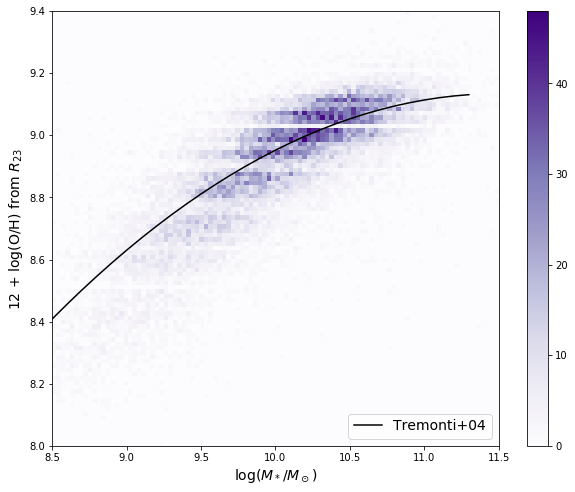

In [70]:
plt.figure(figsize=(10, 8))
*_, im = plt.hist2d(df.lgm_tot_p50, df.oh_p50, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmap='Purples')
plt.colorbar(im)

# Tremonti+04 equation 3
logm_bins = np.arange(8.5, 11.3, 0.1)
mmr = lambda logm: -1.492 + 1.847*logm -0.08026*logm**2
plt.plot(logm_bins, mmr(logm_bins), c='k', label='Tremonti+04')

plt.xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

## Repeat but with our predictions

This will be interesting: if the CNN-predicted relation appears to be tighter than the $R_{23}$ data that it was trained on, then perhaps there is some information in the morphology that is needed to predict metallicity, despite not being captured in the [O II], [O III], and H$\beta$ lines.

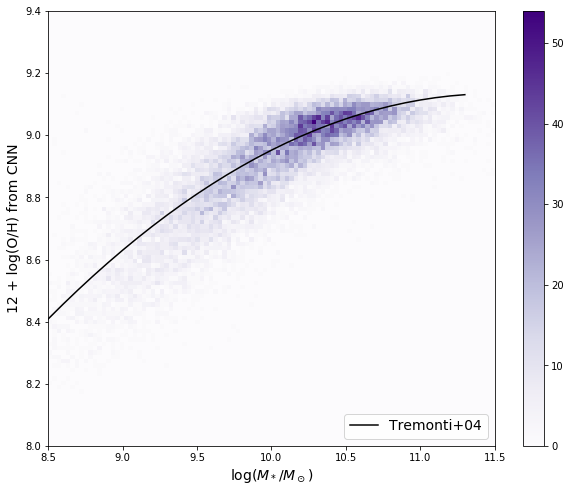

In [71]:
plt.figure(figsize=(10, 8))
*_, im = plt.hist2d(df.lgm_tot_p50, df.prediction, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmap='Purples')
plt.colorbar(im)

# Tremonti+04 equation 3
logm_bins = np.arange(8.5, 11.3, 0.1)
mmr = lambda logm: -1.492 + 1.847*logm -0.08026*logm**2
plt.plot(logm_bins, mmr(logm_bins), c='k', label='Tremonti+04')

plt.xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('12 + log(O/H) from CNN', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

Side by side comparison

No handles with labels found to put in legend.


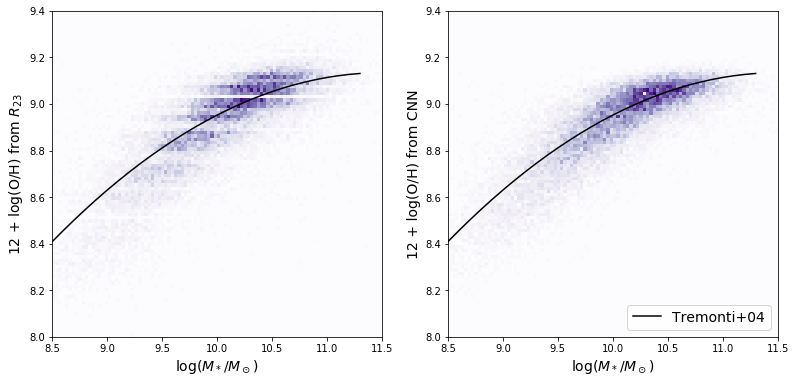

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
*_, im = ax1.hist2d(df.lgm_tot_p50, df.oh_p50, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

# Tremonti+04 equation 3
logm_bins = np.arange(8.5, 11.3, 0.1)
mmr = lambda logm: -1.492 + 1.847*logm -0.08026*logm**2
ax1.plot(logm_bins, mmr(logm_bins), c='k')


ax1.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
ax1.set_ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

*_, im = ax2.hist2d(df.lgm_tot_p50, df.prediction, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

ax2.plot(logm_bins, mmr(logm_bins), c='k', label='Tremonti+04')
ax2.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('12 + log(O/H) from CNN', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

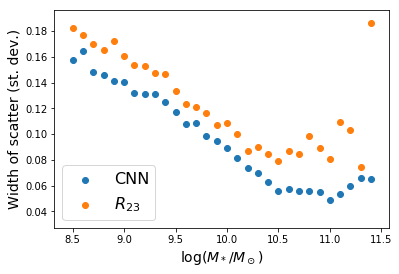

In [93]:
mass_bins = np.arange(8.5, 11.5, 0.1)
oh_pred_scatter = [np.std(df.prediction[(df.lgm_tot_p50 < m+0.05) & (df.lgm_tot_p50 > m-0.05)]) for m in mass_bins]
oh_spec_scatter = [np.std(df.oh_p50[(df.lgm_tot_p50 < m+0.05) & (df.lgm_tot_p50 > m-0.05)]) for m in mass_bins]

plt.scatter(mass_bins, oh_pred_scatter, label='CNN')
plt.scatter(mass_bins, oh_spec_scatter, label='$R_{23}$')
plt.legend(fontsize=16)
plt.xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('Width of scatter (st. dev.)', fontsize=14);

## Results: we can beat the MMR in terms of scatter

Ths is remarkable because we are finding a **tighter** correlation between a CNN-predicted 12+log(O/H) and spectroscopically-derived mass than from both quantities derived from spectroscopy.

## Steven's test: remove "outliers"
Remove the high deviation predictions from the entire dataframe. That way, the distributions of spectroscopic and predicted 12+log(O/H) should be similar.

### Outliers still in:

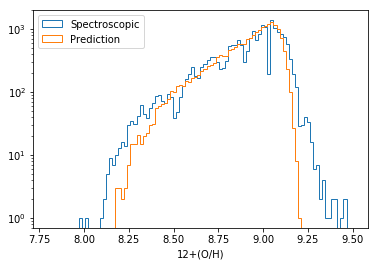

In [95]:
plt.hist(df.oh_p50, range=[7.8, 9.5], bins=100, histtype='step', label='Spectroscopic')
plt.hist(df.prediction, range=[7.8, 9.5], bins=100, histtype='step', label='Prediction')

plt.xlabel(r'12+(O/H)')
plt.yscale('log')
plt.legend(loc='upper left');

### Outliers removed: $N$ sigma cut

In [112]:
mean_rmse = 0.085
df_tight = df[np.abs(df.oh_p50 - df.prediction) < 1*mean_rmse]
df_tight.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50
count,15537.000000,15537.000000,15537.000000,15537.000000,15537.000000
mean,8.941666,8.936309,0.080549,10.090716,0.227865
std,0.162853,0.154644,0.038718,0.508870,0.513718
min,8.141025,8.177104,0.020077,8.517160,-2.371827
25%,8.855869,8.860542,0.052085,9.756926,-0.087125
50%,8.985425,8.981038,0.074345,10.137290,0.236170
75%,9.062400,9.049678,0.102012,10.458320,0.570222
max,9.263840,9.199911,0.289931,12.492280,3.875005


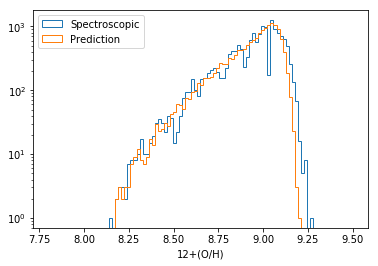

In [113]:
plt.hist(df_tight.oh_p50, range=[7.8, 9.5], bins=100, histtype='step', label='Spectroscopic')
plt.hist(df_tight.prediction, range=[7.8, 9.5], bins=100, histtype='step', label='Prediction')

plt.xlabel(r'12+(O/H)')
plt.yscale('log')
plt.legend(loc='upper left');

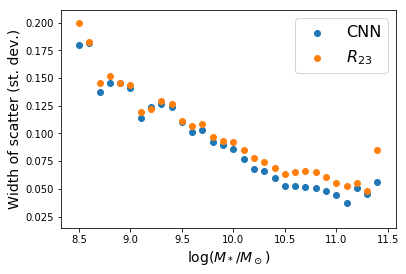

In [114]:
mass_bins = np.arange(8.5, 11.5, 0.1)
oh_pred_scatter = [np.std(df_tight.prediction[(df_tight.lgm_tot_p50 < m+0.05) & (df_tight.lgm_tot_p50 > m-0.05)]) for m in mass_bins]
oh_spec_scatter = [np.std(df_tight.oh_p50[(df_tight.lgm_tot_p50 < m+0.05) & (df_tight.lgm_tot_p50 > m-0.05)]) for m in mass_bins]

plt.scatter(mass_bins, oh_pred_scatter, label='CNN')
plt.scatter(mass_bins, oh_spec_scatter, label='$R_{23}$')
plt.legend(fontsize=16)
plt.xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('Width of scatter (st. dev.)', fontsize=14);

No handles with labels found to put in legend.


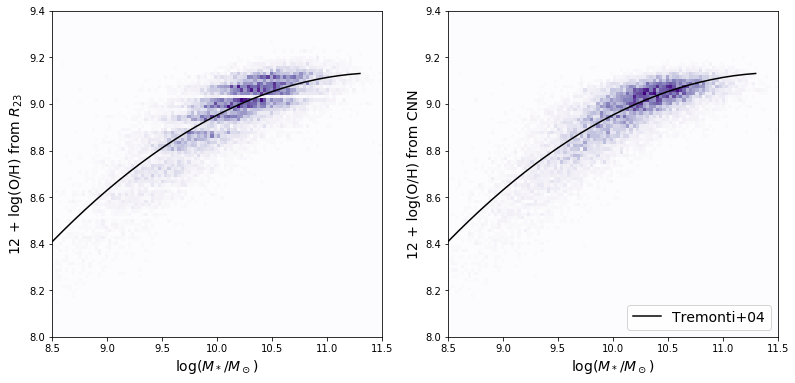

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
*_, im = ax1.hist2d(df_tight.lgm_tot_p50, df_tight.oh_p50, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

# Tremonti+04 equation 3
logm_bins = np.arange(8.5, 11.3, 0.1)
mmr = lambda logm: -1.492 + 1.847*logm -0.08026*logm**2
ax1.plot(logm_bins, mmr(logm_bins), c='k')


ax1.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
ax1.set_ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)


*_, im = ax2.hist2d(df_tight.lgm_tot_p50, df_tight.prediction, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

ax2.plot(logm_bins, mmr(logm_bins), c='k', label='Tremonti+04')
ax2.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('12 + log(O/H) from CNN', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

## Outliers removed: hard cut

In [108]:
df_tight = df[(df.oh_p50 > 8.25) & (df.oh_p50 < 9.15)]
df_tight.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50
count,19631.000000,19631.000000,19631.000000,19631.000000,19631.000000
mean,8.902496,8.906272,0.076757,10.001422,0.143616
std,0.186675,0.166534,0.038591,0.535428,0.533852
min,8.250810,8.187387,0.020014,8.509598,-2.562046
25%,8.807299,8.815413,0.047696,9.638858,-0.191572
50%,8.951406,8.952250,0.070831,10.043290,0.159271
75%,9.049978,9.034529,0.097513,10.391440,0.501479
max,9.149965,9.180563,0.314083,12.492280,3.875005


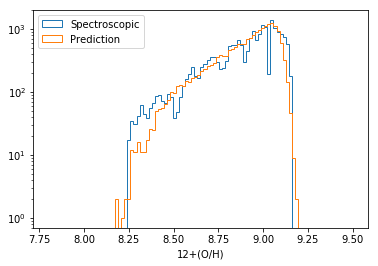

In [109]:
plt.hist(df_tight.oh_p50, range=[7.8, 9.5], bins=100, histtype='step', label='Spectroscopic')
plt.hist(df_tight.prediction, range=[7.8, 9.5], bins=100, histtype='step', label='Prediction')

plt.xlabel(r'12+(O/H)')
plt.yscale('log')
plt.legend(loc='upper left');

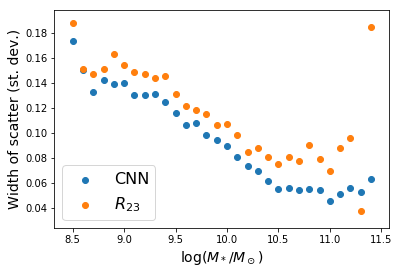

In [110]:
mass_bins = np.arange(8.5, 11.5, 0.1)
oh_pred_scatter = [np.std(df_tight.prediction[(df_tight.lgm_tot_p50 < m+0.05) & (df_tight.lgm_tot_p50 > m-0.05)]) for m in mass_bins]
oh_spec_scatter = [np.std(df_tight.oh_p50[(df_tight.lgm_tot_p50 < m+0.05) & (df_tight.lgm_tot_p50 > m-0.05)]) for m in mass_bins]

plt.scatter(mass_bins, oh_pred_scatter, label='CNN')
plt.scatter(mass_bins, oh_spec_scatter, label='$R_{23}$')
plt.legend(fontsize=16)
plt.xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('Width of scatter (st. dev.)', fontsize=14);

No handles with labels found to put in legend.


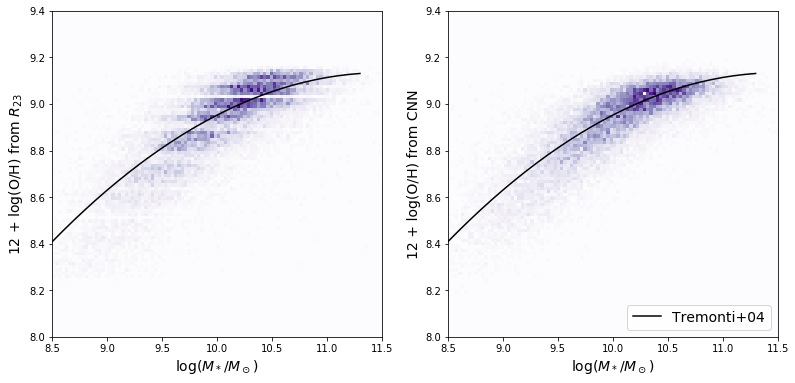

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
*_, im = ax1.hist2d(df_tight.lgm_tot_p50, df_tight.oh_p50, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

# Tremonti+04 equation 3
logm_bins = np.arange(8.5, 11.3, 0.1)
mmr = lambda logm: -1.492 + 1.847*logm -0.08026*logm**2
ax1.plot(logm_bins, mmr(logm_bins), c='k')


ax1.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
ax1.set_ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

*_, im = ax2.hist2d(df_tight.lgm_tot_p50, df_tight.prediction, bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

ax2.plot(logm_bins, mmr(logm_bins), c='k', label='Tremonti+04')
ax2.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
plt.ylabel('12 + log(O/H) from CNN', fontsize=14)

plt.legend(loc='lower right', fontsize=14)

# Check fundamental metallictiy relation (FMR)
Lara-Lopez et al. (2010) and Mannucci et al. (2010) independently found that a thin 2d surface exists in the SFR-metallicity-$M_*$ volume.

In [72]:
import corner

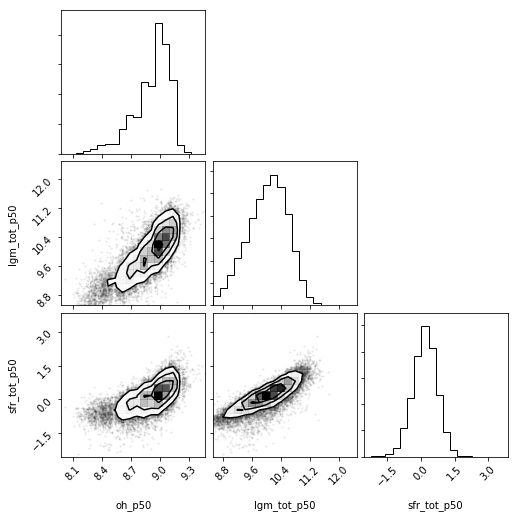

In [74]:
corner.corner(df[['oh_p50', 'lgm_tot_p50', 'sfr_tot_p50']]);

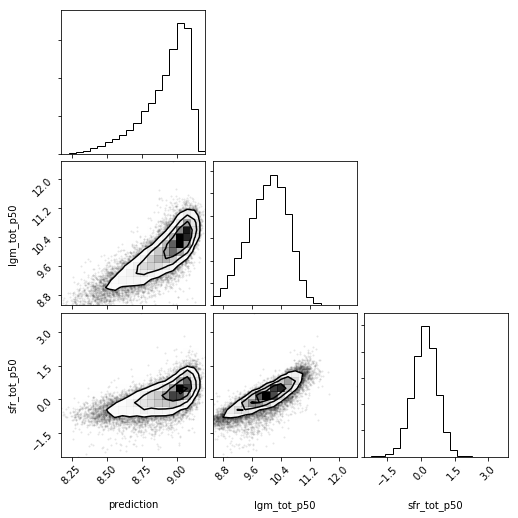

In [75]:
corner.corner(df[['prediction', 'lgm_tot_p50', 'sfr_tot_p50']]);

## compare with Mannucci+10

# Color information

In [121]:
gmi = pd.DataFrame(full_df.modelMag_g - full_df.modelMag_i, columns=['gmi'])

In [124]:
df2 = preds.join(full_df[['z', 'lgm_tot_p50', 'sfr_tot_p50']], how='left').join(gmi, how='left')
df2.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50,gmi
count,20469.000000,20469.000000,20469.000000,20469.000000,20469.000000,20469.000000
mean,8.905762,8.907596,0.077032,8.053379,0.155715,0.906298
std,0.200183,0.174791,0.039441,139.908615,0.556713,0.253394
min,7.896335,8.129671,0.020014,-9999.000000,-4.296250,-6.654230
25%,8.808699,8.816455,0.047412,9.639691,-0.189364,0.735880
50%,8.955700,8.957461,0.070864,10.058110,0.171290,0.898220
75%,9.054276,9.039477,0.098012,10.415460,0.527031,1.070820
max,9.465558,9.199911,0.364123,12.492280,3.875005,5.428870


In [129]:
# only select high-mass + g-i > -2 and g-i < 3
df2 = df2[(df2.lgm_tot_p50 > 8.5) & (df2.gmi > -2) & (df2.gmi < 3)].copy()
df2.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50,gmi
count,20353.000000,20353.000000,20353.000000,20353.000000,20353.000000,20353.000000
mean,8.908435,8.910073,0.077256,10.018184,0.161406,0.909813
std,0.196276,0.170984,0.039315,0.549034,0.546751,0.229603
min,7.975870,8.177104,0.020014,8.509598,-2.562046,-0.639970
25%,8.810446,8.818902,0.047697,9.647556,-0.181449,0.739450
50%,8.956769,8.958316,0.071072,10.062800,0.174883,0.899890
75%,9.054508,9.039809,0.098245,10.417470,0.528808,1.071400
max,9.465558,9.199911,0.314083,12.492280,3.875005,2.819700


In [132]:
# reduce outliers
df2_tight = df2[(df2.oh_p50 > 8.25) & (df2.oh_p50 < 9.15)]
df2_tight.describe()

,oh_p50,prediction,z,lgm_tot_p50,sfr_tot_p50,gmi
count,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000
mean,8.902569,8.906345,0.076769,10.001607,0.143841,0.904722
std,0.186693,0.166538,0.038600,0.535545,0.533817,0.226589
min,8.250810,8.187387,0.020014,8.509598,-2.562046,-0.639970
25%,8.807445,8.815435,0.047694,9.638859,-0.191064,0.735677
50%,8.951436,8.952378,0.070844,10.043585,0.159404,0.892565
75%,9.049990,9.034609,0.097561,10.391873,0.501658,1.062085
max,9.149965,9.180563,0.314083,12.492280,3.875005,2.819700


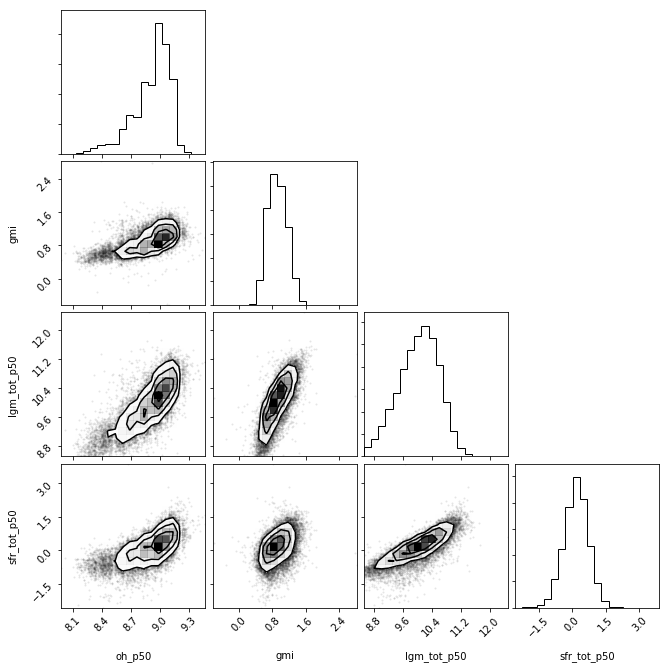

In [133]:
corner.corner(df2[['oh_p50', 'gmi', 'lgm_tot_p50', 'sfr_tot_p50']]);

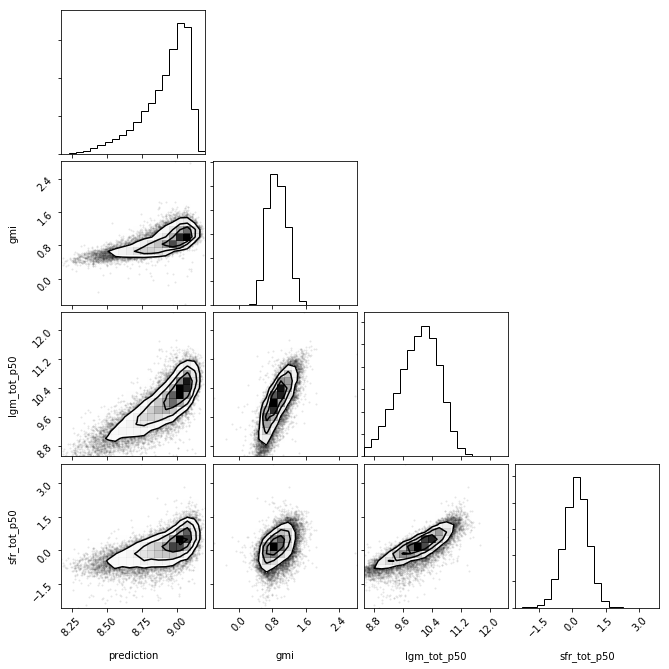

In [134]:
corner.corner(df2[['prediction', 'gmi', 'lgm_tot_p50', 'sfr_tot_p50']]);

## slices of color

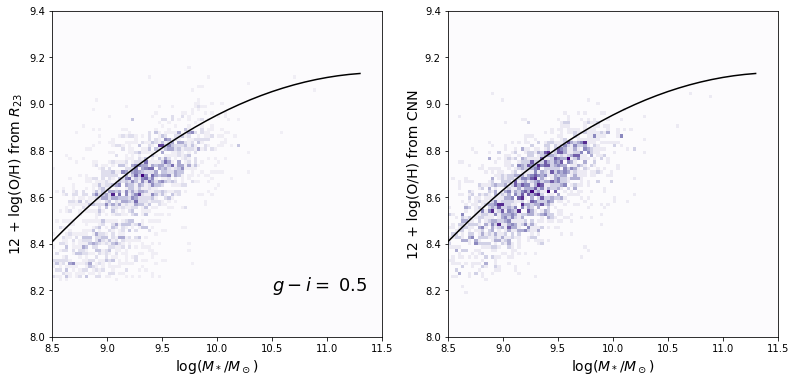

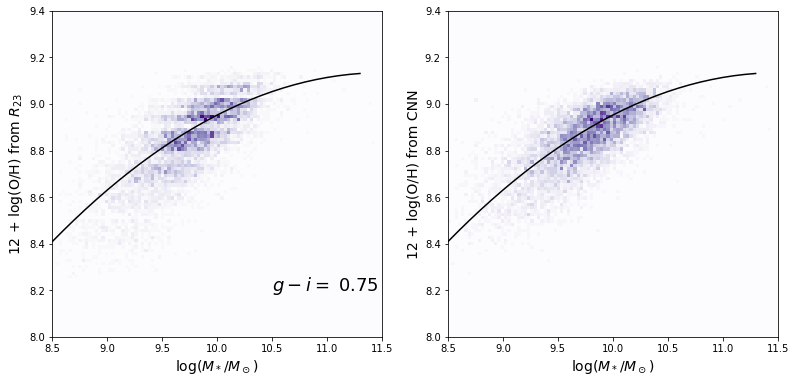

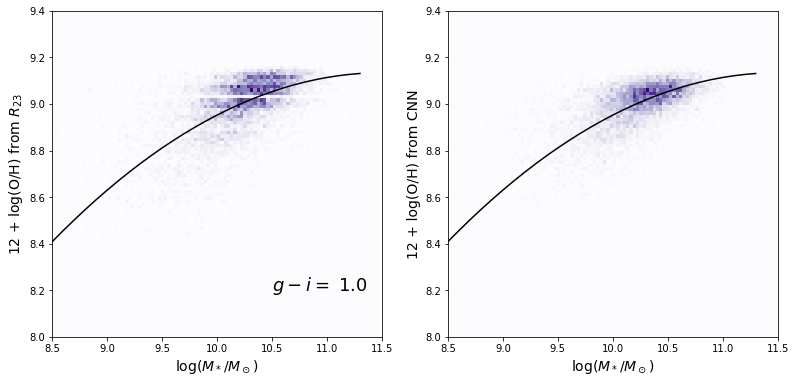

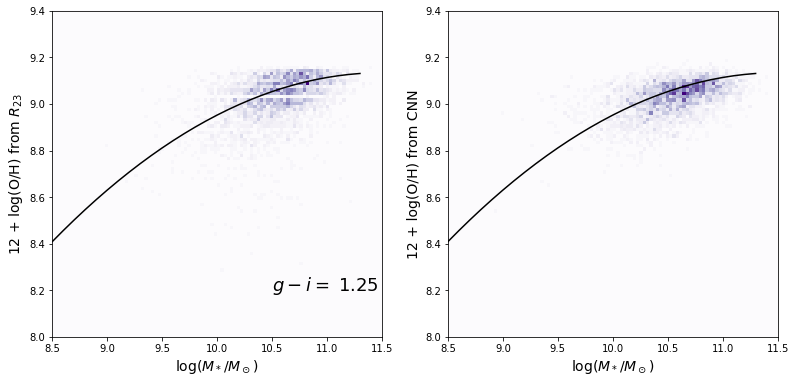

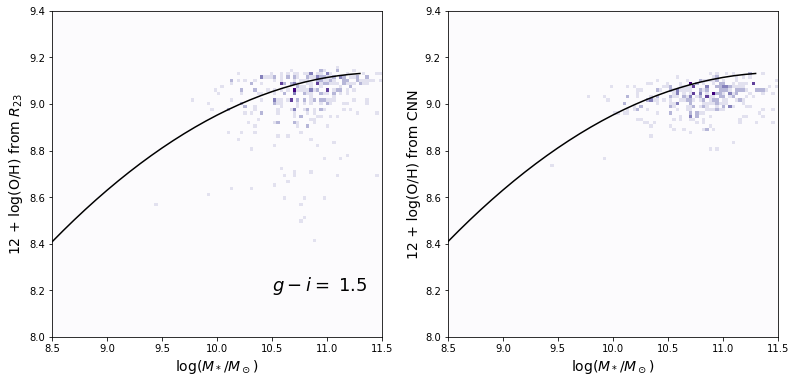

In [138]:
for color in np.arange(0.5, 1.75, 0.25):
    color_range = (df2_tight.gmi > color - 0.125) & (df2_tight.gmi < color + 0.125)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
    
    
    *_, im = ax1.hist2d(df2_tight[color_range].lgm_tot_p50, 
                        df2_tight[color_range].oh_p50, 
                        bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')
    
    ax1.plot(logm_bins, mmr(logm_bins), c='k')

    ax1.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
    ax1.set_ylabel('12 + log(O/H) from $R_{23}$', fontsize=14)
    
    ax1.text(10.5, 8.2, f'$g-i = $ {color}', fontsize=18)


    *_, im = ax2.hist2d(df2_tight[color_range].lgm_tot_p50, 
                        df2_tight[color_range].prediction, 
                        bins=100, range=([8.5, 11.5], [8.0, 9.4]), cmin=0, cmax=50, cmap='Purples')

    ax2.plot(logm_bins, mmr(logm_bins), c='k')
    ax2.set_xlabel('log($M_*/M_\odot$)', fontsize=14)
    plt.ylabel('12 + log(O/H) from CNN', fontsize=14)


    plt.show()

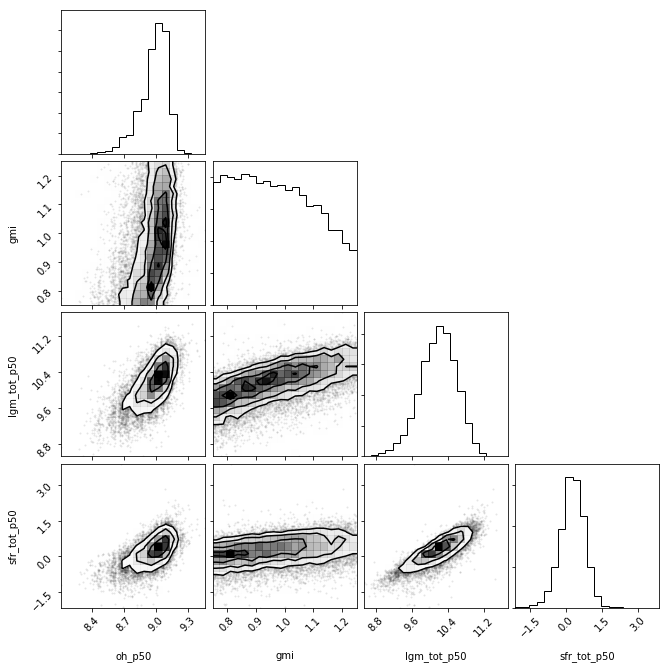

In [140]:
corner.corner(df2[(df2.gmi < 1.25) & (df2.gmi > 0.75)][['oh_p50', 'gmi', 'lgm_tot_p50', 'sfr_tot_p50']]);

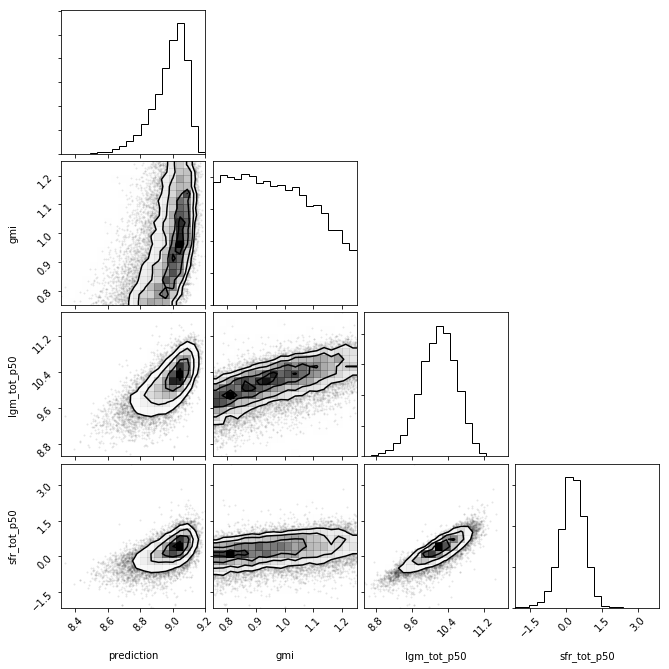

In [139]:
corner.corner(df2[(df2.gmi < 1.25) & (df2.gmi > 0.75)][['prediction', 'gmi', 'lgm_tot_p50', 'sfr_tot_p50']]);